http://genp.pku.edu.cn/wiki/Efficiency%20Calibration
效率刻度的主页

http://genp.pku.edu.cn/wiki/log
不同路径的实验数据对应的位置

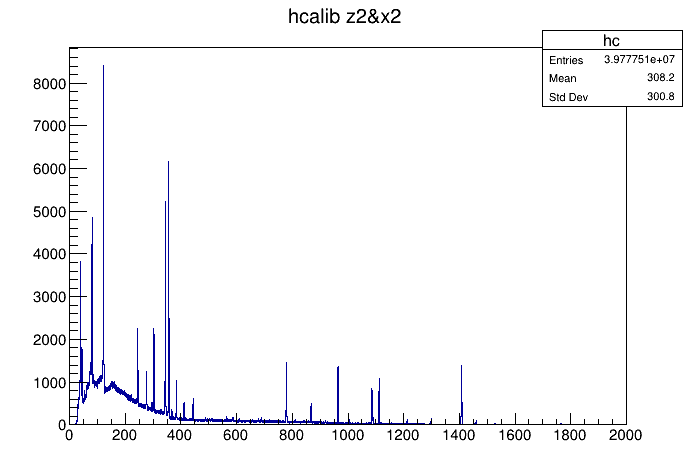

In [1]:
%jsroot on
TFile *f = new TFile("calib.root");
TH1D *hc =(TH1D*)gROOT->FindObject("hc");
TCanvas *c1 = new TCanvas;
c1->cd();
hc->Draw();
c1->Draw();

In [2]:
f->Close();

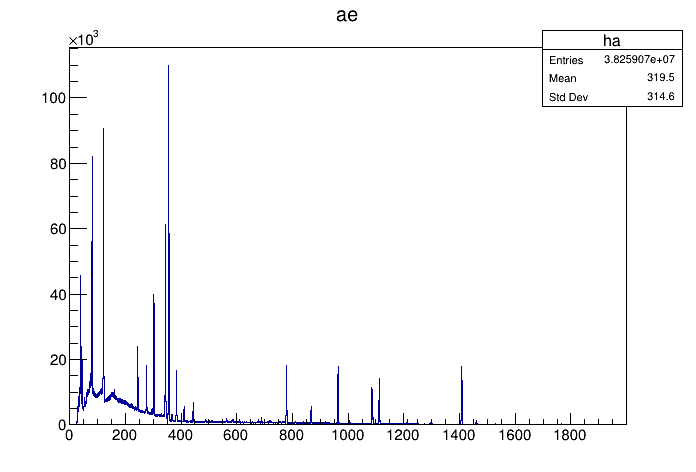

In [3]:
TFile *ipt = new TFile("../EuricaData/zqchen/x2/outcali.root");
TH1D *hg = (TH1D*)gROOT->FindObject("ha");
Double_t binned = 1;
TH1D *hg2 = (TH1D*)hg->Rebin(binned,"hgbinned");
hg->Draw();
c1->Draw();

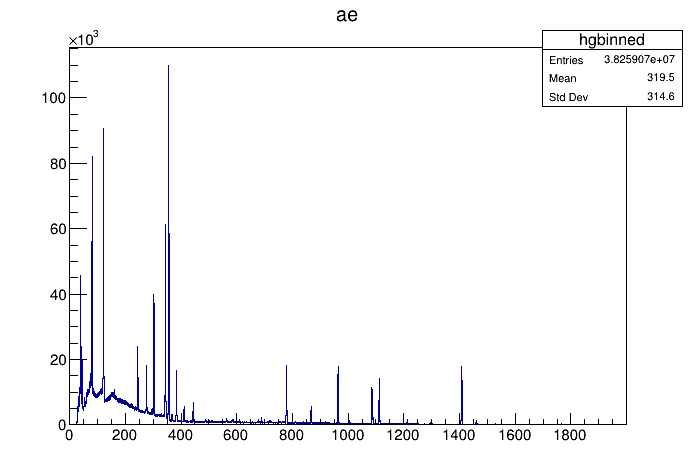

In [4]:
hg2->Draw();
c1->Draw();

In [5]:
.L ana.C

http://genp.pku.edu.cn/wiki/Efficiency%20Calibration%20by%20Z.Li
本底扣除的方法

Info in ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 


peak: 81eff: 0.1321
peak: 160.6eff: 0.193374
peak: 223.2eff: 0.168674
peak: 276.4eff: 0.134143
peak: 302.9eff: 0.127985
peak: 356eff: 0.121469
peak: 383.8eff: 0.120892
peak: 121.8eff: 0.152878
peak: 244.7eff: 0.140697
peak: 344.3eff: 0.127584


Info in ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The v

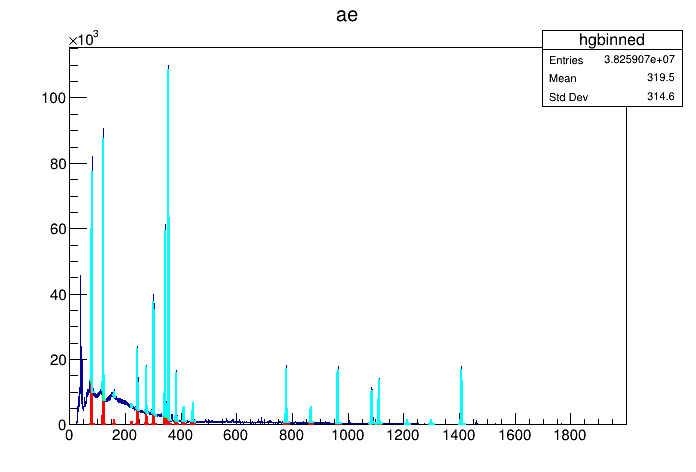

peak: 411.1eff: 0.117928
peak: 444eff: 0.112084
peak: 778.9eff: 0.0901205
peak: 867.4eff: 0.0850226
peak: 965.1eff: 0.080239
peak: 1085.8eff: 0.0835542
peak: 1112.1eff: 0.0780853
peak: 1213eff: 0.0743462
peak: 1299.2eff: 0.0708958
peak: 1408eff: 0.0695545


Info in ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The v

In [6]:
auto *ge1 = new TGraphErrors;
auto *ge2 = new TGraphErrors;
Int_t j = 0;
for(int i=0;i<20;i++){
    pfit1(hg2,peak[i],res[i],10,10);
    if(i<7){
    ceff[i]=(res[i][3]-res[i][4]*10/binned)/(A_Ba*N_Trig*I_gamma[i]*T_acq/100.);
    cerror[i]=ceff[i]* TMath::Sqrt((res[i][3]+(10/binned)*res[i][4])/((res[i][3]-(10/binned)*res[i][4])*(res[i][3]-(10/binned)*res[i][4]))+Ba_Error*Ba_Error/(A_Ba*A_Ba)+I_Error[i]*I_Error[i]/(I_gamma[i]*I_gamma[i]));}
    else{
    ceff[i]=(res[i][3]-res[i][4]*10/binned)/(A_Eu*N_Trig*I_gamma[i]*T_acq/100.);
    cerror[i]=ceff[i]* TMath::Sqrt((res[i][3]+(10/binned)*res[i][4])/((res[i][3]-(10/binned)*res[i][4])*(res[i][3]-(10/binned)*res[i][4]))+Eu_Error*Eu_Error/(A_Eu*A_Eu)+I_Error[i]*I_Error[i]/(I_gamma[i]*I_gamma[i]));}
    if(i<2||i>6)
    {ge1->SetPoint(j,peak[i],ceff[i]);
    ge1->SetPointError(j,0,cerror[i]);
    j++;}
    ge2->SetPoint(i,peak[i],ceff[i]);
    cout << "peak: " << peak[i] << "" <<"eff: " <<ceff[i] << endl;
    ge2->SetPointError(i,0,cerror[i]);
}
c1->Draw();                                   

http://genp.pku.edu.cn/wiki/Efficiency%20functions
各效率刻度函数

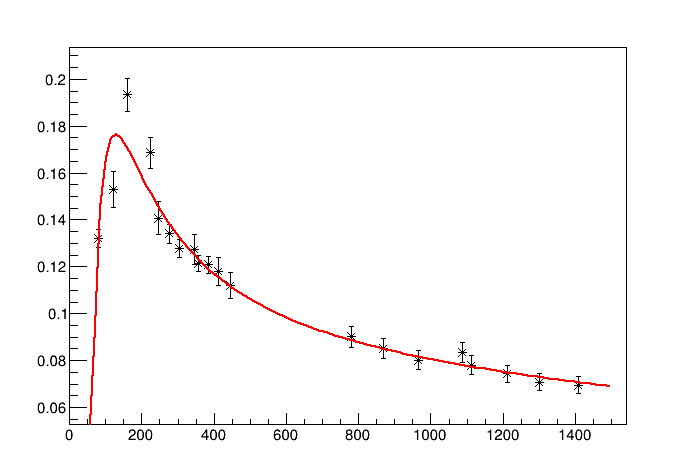

 FCN=32.575 FROM HESSE     STATUS=NOT POSDEF     40 CALLS         295 TOTAL
                     EDM=5.20894e-07    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -4.25247e+02   2.11408e+00   1.42207e-04   2.73106e-04
   2  p1           1.37504e+02   5.83902e-01   3.27836e-05   5.03107e-04
   3  p2           6.91116e+00   1.15783e-01   5.63868e-06  -6.07216e-03
   4  p3          -4.66913e+00   2.01594e-02   1.11321e-06  -2.92936e-02
   5  p4           6.36738e-02   5.93838e-04   3.14130e-08  -7.22407e-01
   6  p5          -3.14915e-04   8.69887e-06   8.06279e-10   5.31133e+01


In [7]:
c1->Clear();
Double_t par[10]={1};
TF1 *fgrayfun = new TF1("calibfit1",grayfun,50,1500,6);
fgrayfun->SetParameters(par);
ge2->Fit("calibfit1","","",50.0,1500.0);
fgrayfun->GetParameters(par);
ge2->Draw("AP*");
fgrayfun->Draw("same");
c1->Draw();

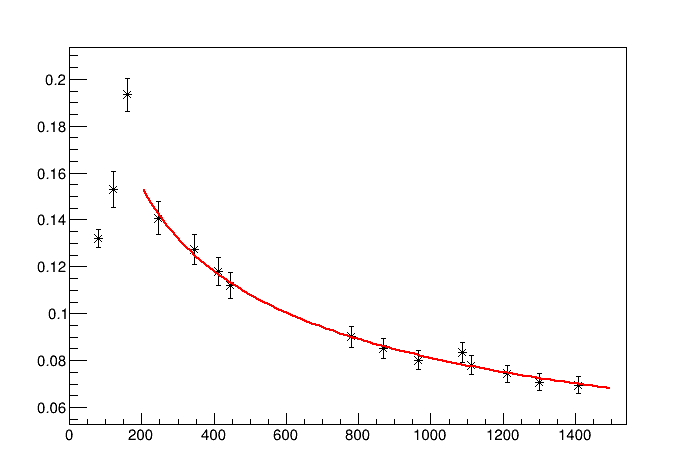

 FCN=2.44965 FROM MIGRAD    STATUS=CALL LIMIT   1361 CALLS        1362 TOTAL
                     EDM=0.00241671    STRATEGY= 1  ERROR MATRIX UNCERTAINTY  23.9 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.97590e-01   6.63556e-01  -1.58124e-02   6.92383e-01
   2  p1           1.64536e-01   2.39362e-01  -6.30762e-03  -1.56576e+00
   3  p2          -1.52498e-02   9.87478e-03  -2.88146e-04  -1.95229e+00


Warning in <Fit>: Abnormal termination of minimization.


In [8]:
c1->Clear();
par[0]=1.;
par[1]=1.;
par[2]=-1.;
TF1 *fKane = new TF1("calibfit2",fitKane,200,1500,3);
fKane->SetParameters(par);
ge1->Fit("calibfit2","","",200.0,1500.0);
fKane->GetParameters(par);
ge1->Draw("AP*");
fKane->Draw("same");
c1->Draw();

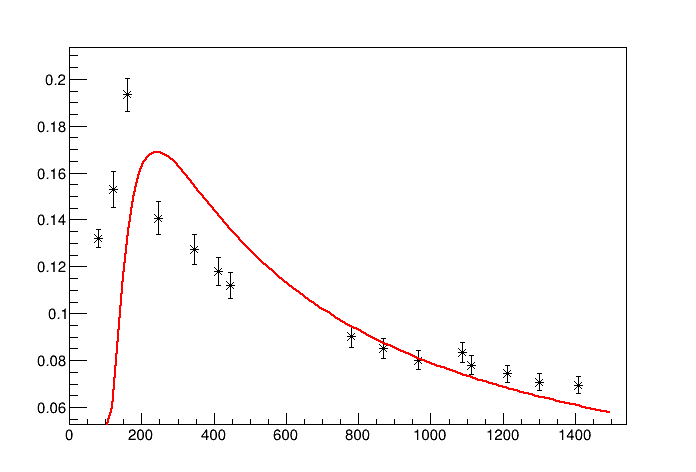

 FCN=1349.59 FROM MIGRAD    STATUS=CONVERGED     557 CALLS         558 TOTAL
                     EDM=5.09038e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.96899e-02   2.56111e-02   3.74717e-05   6.77447e-03
   2  p1          -5.60123e-02   3.93425e-03   5.75626e-06   5.67130e-02
   3  p2           2.80252e+06   1.41421e+00   1.03854e+02   2.22584e-04


In [9]:
c1->Clear();
par[0]=-1.;
par[1]=1.;
par[2]=-1.;
TF1 *fWillett = new TF1("calibfit3",fitWillett,70,1500,3);
fWillett->SetParameters(par);
ge1->Fit("calibfit3","","",70.0,1500.0);
fWillett->GetParameters(par);
ge1->Draw("AP*");
fWillett->Draw("same");
c1->Draw();

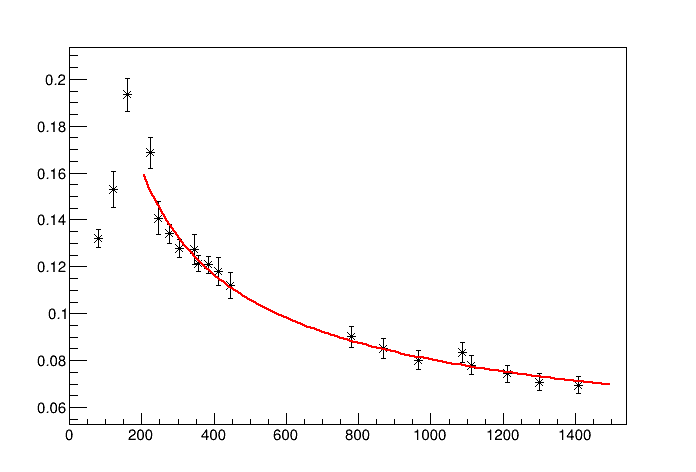

 FCN=11.8536 FROM HESSE     STATUS=NOT POSDEF     40 CALLS         728 TOTAL
                     EDM=1.77315e-08    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -4.45944e+00   1.25175e-01   3.52765e-06  -1.07834e-02
   2  p1          -8.08913e+00   7.25587e-02   2.12232e-06  -2.49785e-02
   3  p2           4.71968e+00   2.73116e-02   1.12526e-06  -6.02375e-02
   4  p3          -4.45944e+00   1.25191e-01   3.52765e-06  -1.07832e-02
   5  p4          -1.40158e+01   1.00707e-01   3.68809e-06  -1.49056e-04
   6  p5          -4.68012e+00   4.38129e-02   3.06976e-06  -2.38001e-03


In [10]:
c1->Clear();
for(int i=0;i<10;i++) par[i]=1;
par[6]=-1;
TF1 *pfzqchen = new TF1("calibfit4",prefitzqchen,200,1500,6);
pfzqchen->SetParameters(par);
ge2->Fit("calibfit4","","",200.0,1500.0);
pfzqchen->GetParameters(par);
ge2->Draw("AP*");
pfzqchen->Draw("same");
c1->Draw();

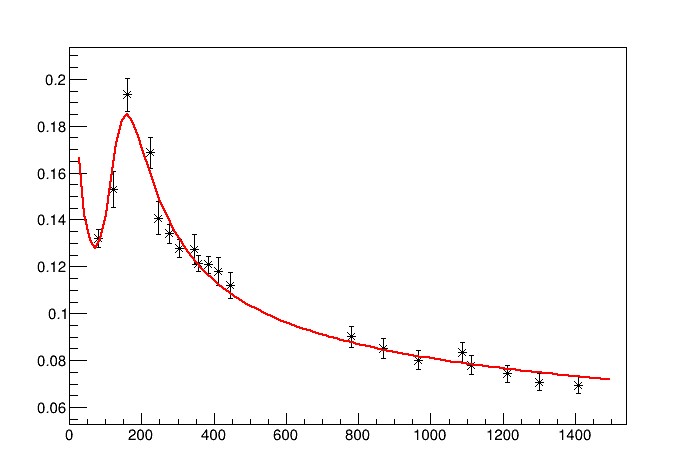

 FCN=17.9837 FROM MIGRAD    STATUS=FAILED       1580 CALLS        1581 TOTAL
                     EDM=0.000258639    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -6.52879e+06   1.10473e+08   0.00000e+00   6.25240e-05
   2  p1          -9.24052e+06   1.56786e+08   0.00000e+00  -7.19183e-05
   3  p2           3.01070e+06   5.08967e+07  -0.00000e+00   1.70825e-04
   4  p3           3.69465e+06   6.26725e+07  -0.00000e+00  -3.01544e-04
   5  p4          -4.16753e+05   7.03498e+06   0.00000e+00   8.21502e-05
   6  p5          -3.73040e+05   6.32609e+06   0.00000e+00  -1.17976e-03
   7  p6           1.44686e+04   2.43346e+05  -0.00000e+00  -4.31392e-03


Warning in <Fit>: Abnormal termination of minimization.


In [11]:
c1->Clear();
TF1 *fzxzhou = new TF1("calibfit5",fitzxzhou,20,1500,7);
par[0] = 0.145;
par[1] = -4.7;
par[2] = -0.08;
par[3] = 0.074;
par[4] = 0.013;
par[5] = -0.0034;
par[6] = -7e-4;
fzxzhou->SetParameters(par);
ge2->Fit("calibfit5","","",20.0,1500.0);
fzxzhou->GetParameters(par);
ge2->Draw("AP*");
fzxzhou->Draw("same");
c1->Draw();

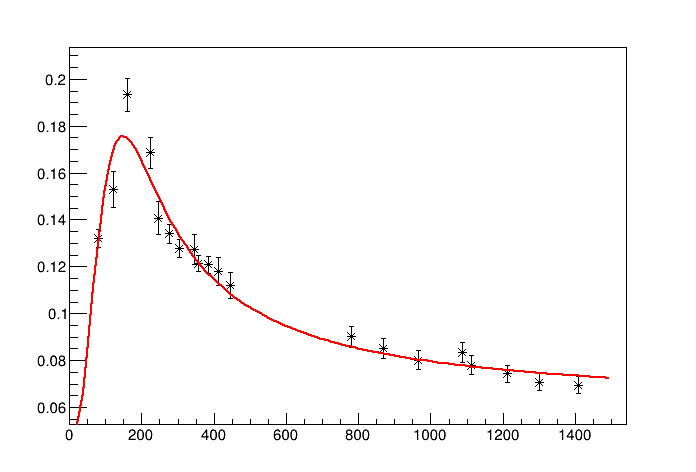

 FCN=29.4066 FROM MIGRAD    STATUS=CONVERGED     232 CALLS         233 TOTAL
                     EDM=1.43808e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.54262e-02   4.38416e-02   6.12162e-06  -6.23574e-01
   2  p1          -8.43299e-03   1.14207e-03   3.01485e-07   1.25379e+01
   3  p2           5.34637e-04   6.77482e-04   4.21259e-08  -8.46220e+01
   4  p3           5.83064e-05   2.11432e-05   1.13336e-09   2.10704e+03
   5  p4           3.48559e-06   1.08018e-06   1.26839e-10  -1.41338e+04


In [12]:
c1->Clear();
TF1 *fzxzhou2 = new TF1("calibfit6",fitzxzhou2,0,1500,5);
par[0] = 0.06;
par[1] = -0.01;
par[2] = 7.e-5;
par[3] = 5.e-5;
par[4] = 3.2e-6;
fzxzhou2->SetParameters(par);
ge2->Fit("calibfit6","","",0.0,1500.0);
fzxzhou2->GetParameters(par);
ge2->Draw("AP*");
fzxzhou2->Draw("same");
c1->Draw();

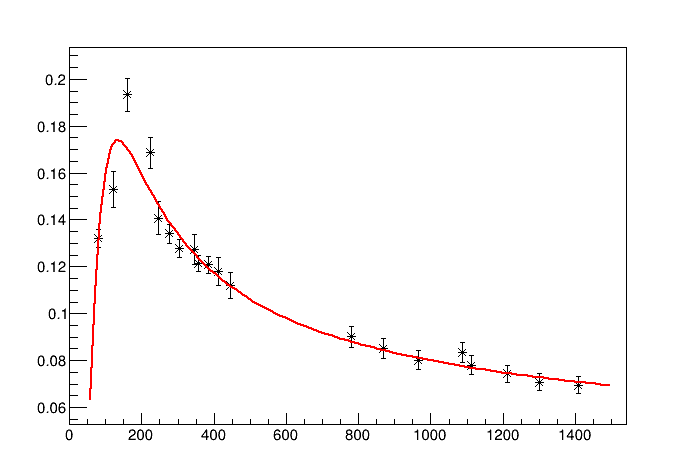

 FCN=31.1718 FROM MIGRAD    STATUS=CONVERGED     262 CALLS         263 TOTAL
                     EDM=2.17399e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -3.30830e-02   4.51776e-03   3.75804e-07   2.28423e-01
   2  p1          -4.33672e-01   7.40657e-03   5.46099e-07   2.94712e-01
   3  p2           9.05739e-03   8.80680e-04   7.27547e-08  -4.79743e-01
   4  p3           4.95558e-02   1.42166e-03   1.04525e-07   2.25988e+00


In [13]:
c1->Clear();
TF1 *fzxzhou3 = new TF1("calibfit7",fitzxzhou3,50,1500,4);
par[0] = -0.03;
par[1] = -0.4;
par[2] = 0.0075;
par[3] = 0.05;;
fzxzhou3->SetParameters(par);
ge2->Fit("calibfit7","","",50.0,1500.0);
fzxzhou3->GetParameters(par);
ge2->Draw("AP*");
fzxzhou3->Draw("same");
c1->Draw();

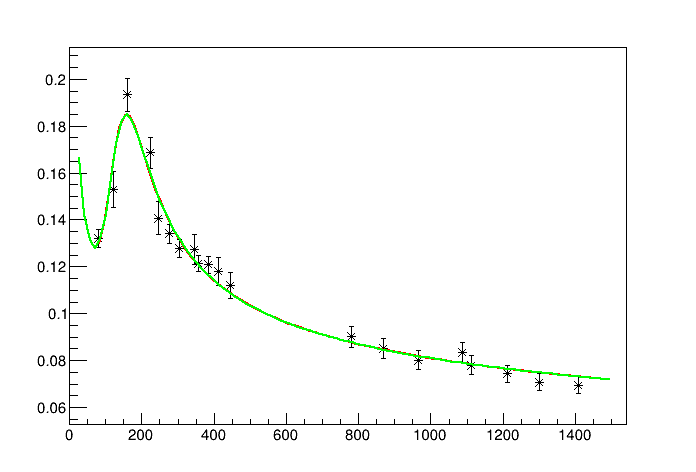

 FCN=17.9837 FROM MIGRAD    STATUS=FAILED       1580 CALLS        1581 TOTAL
                     EDM=0.000258639    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -6.52879e+06   1.10473e+08   0.00000e+00   6.25240e-05
   2  p1          -9.24052e+06   1.56786e+08   0.00000e+00  -7.19183e-05
   3  p2           3.01070e+06   5.08967e+07  -0.00000e+00   1.70825e-04
   4  p3           3.69465e+06   6.26725e+07  -0.00000e+00  -3.01544e-04
   5  p4          -4.16753e+05   7.03498e+06   0.00000e+00   8.21502e-05
   6  p5          -3.73040e+05   6.32609e+06   0.00000e+00  -1.17976e-03
   7  p6           1.44686e+04   2.43346e+05  -0.00000e+00  -4.31392e-03


Warning in <Fit>: Abnormal termination of minimization.


In [14]:
c1->Clear();
TF1 *fzxzhou_ = new TF1("calibfit8",fitzxzhou,75,1500,7);
par[0] = 0.145;
par[1] = -4.7;
par[2] = -0.08;
par[3] = 0.074;
par[4] = 0.013;
par[5] = -0.0034;
par[6] = -7e-4;
fzxzhou_->SetParameters(par);
ge2->Fit("calibfit8","","",75.0,1500.0);
TF1 *fzxzhoudraw = new TF1("fitdraw",fitzxzhou,20,1500,7);
fzxzhou_->GetParameters(par);
fzxzhoudraw->SetParameters(par);
fzxzhoudraw->SetLineColor(kGreen);
ge2->Draw("AP*");
fzxzhoudraw->Draw("same");
c1->Draw();